In [7]:
import pandas as pd
import seaborn as sns
from math import sqrt
from datetime import datetime
from matplotlib import pyplot as plt

In [8]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Flatten

In [3]:
# Cargo el dataset
dataset_E162533 = pd.read_excel("./equipo-E162533.xlsx")
dataset_E162533.head()

,fecha,vel_motor,voltaje,mensaje_volt,horas_comp_trabajadas,temp_planta,Lamps,Lead Curtains,Radiation_mrh,problemas_rechazo,...,rep_filtro_aire,rep_tubo,rep_tarjeta_detector,rep_IOB,rep_otras_tarj,rep_motor,rep_software,rep_PILZ,rep_shutter,rep_cables
0,2017-02-01,26,219,0,8,28,2,2,0.02,0,...,0,0,0,0,0,0,0,0,0,0
1,2017-02-02,22,222,0,9,25,2,2,0.02,0,...,0,0,0,0,0,0,0,0,0,0
2,2017-02-03,24,217,0,9,30,2,2,0.02,0,...,0,0,0,0,0,0,0,0,0,0
3,2017-02-04,22,216,0,9,29,2,2,0.02,0,...,0,0,0,0,0,0,0,0,0,0
4,2017-02-05,24,222,0,8,26,2,2,0.02,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
dataset_E162533_original = dataset_E162533.copy()

In [5]:
dataset_E162533.describe()

,vel_motor,voltaje,mensaje_volt,horas_comp_trabajadas,temp_planta,Lamps,Lead Curtains,Radiation_mrh,problemas_rechazo,mantenimiento,rep_filtro_aire,rep_tubo,rep_tarjeta_detector,rep_IOB,rep_otras_tarj,rep_motor,rep_software,rep_PILZ,rep_shutter,rep_cables
count,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000
mean,22.109564,220.161622,0.016344,7.969734,27.510291,1.991525,1.996368,0.020950,0.078692,0.018765,0.002421,0.002421,0.003632,0.004237,0.003027,0.000605,0.010291,0.001816,0.003027,0.004237
std,3.201602,3.281083,0.126832,0.824550,1.751840,0.091694,0.060174,0.006039,0.269340,0.178184,0.049162,0.049162,0.060174,0.064976,0.054948,0.024603,0.100950,0.042589,0.054948,0.064976
min,17.000000,215.000000,0.000000,7.000000,25.000000,1.000000,1.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,217.000000,0.000000,7.000000,26.000000,2.000000,2.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,22.000000,220.000000,0.000000,8.000000,27.000000,2.000000,2.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,25.000000,223.000000,0.000000,9.000000,29.000000,2.000000,2.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,29.000000,240.000000,1.000000,9.000000,35.000000,2.000000,2.000000,0.090000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
columnas_ds_original = list(dataset_E162533.columns)
columnas_ds_original

['fecha',
 'vel_motor',
 'voltaje',
 'mensaje_volt',
 'horas_comp_trabajadas',
 'temp_planta',
 'Lamps',
 'Lead Curtains',
 'Radiation_mrh',
 'problemas_rechazo',
 'mantenimiento',
 'rep_filtro_aire',
 'rep_tubo',
 'rep_tarjeta_detector',
 'rep_IOB',
 'rep_otras_tarj',
 'rep_motor',
 'rep_software',
 'rep_PILZ',
 'rep_shutter',
 'rep_cables']

In [7]:
dataset_E162533 = dataset_E162533.set_index("fecha")
dataset_E162533

,vel_motor,voltaje,mensaje_volt,horas_comp_trabajadas,temp_planta,Lamps,Lead Curtains,Radiation_mrh,problemas_rechazo,mantenimiento,rep_filtro_aire,rep_tubo,rep_tarjeta_detector,rep_IOB,rep_otras_tarj,rep_motor,rep_software,rep_PILZ,rep_shutter,rep_cables
fecha,,,,,,,,,,,,,,,,,,,,
2017-02-01,26,219,0,8,28,2,2,0.02,0,0,0,0,0,0,0,0,0,0,0,0
2017-02-02,22,222,0,9,25,2,2,0.02,0,0,0,0,0,0,0,0,0,0,0,0
2017-02-03,24,217,0,9,30,2,2,0.02,0,0,0,0,0,0,0,0,0,0,0,0
2017-02-04,22,216,0,9,29,2,2,0.02,0,0,0,0,0,0,0,0,0,0,0,0
2017-02-05,24,222,0,8,26,2,2,0.02,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-06,27,217,0,8,29,2,2,0.05,0,0,0,0,0,0,0,0,0,0,0,0
2021-08-07,27,222,0,9,30,2,2,0.02,0,0,0,0,0,0,0,0,0,0,0,0
2021-08-08,20,217,0,8,25,2,2,0.02,0,0,0,0,0,0,0,0,0,0,0,0


Text(0.5, 1.0, 'Correlacion')

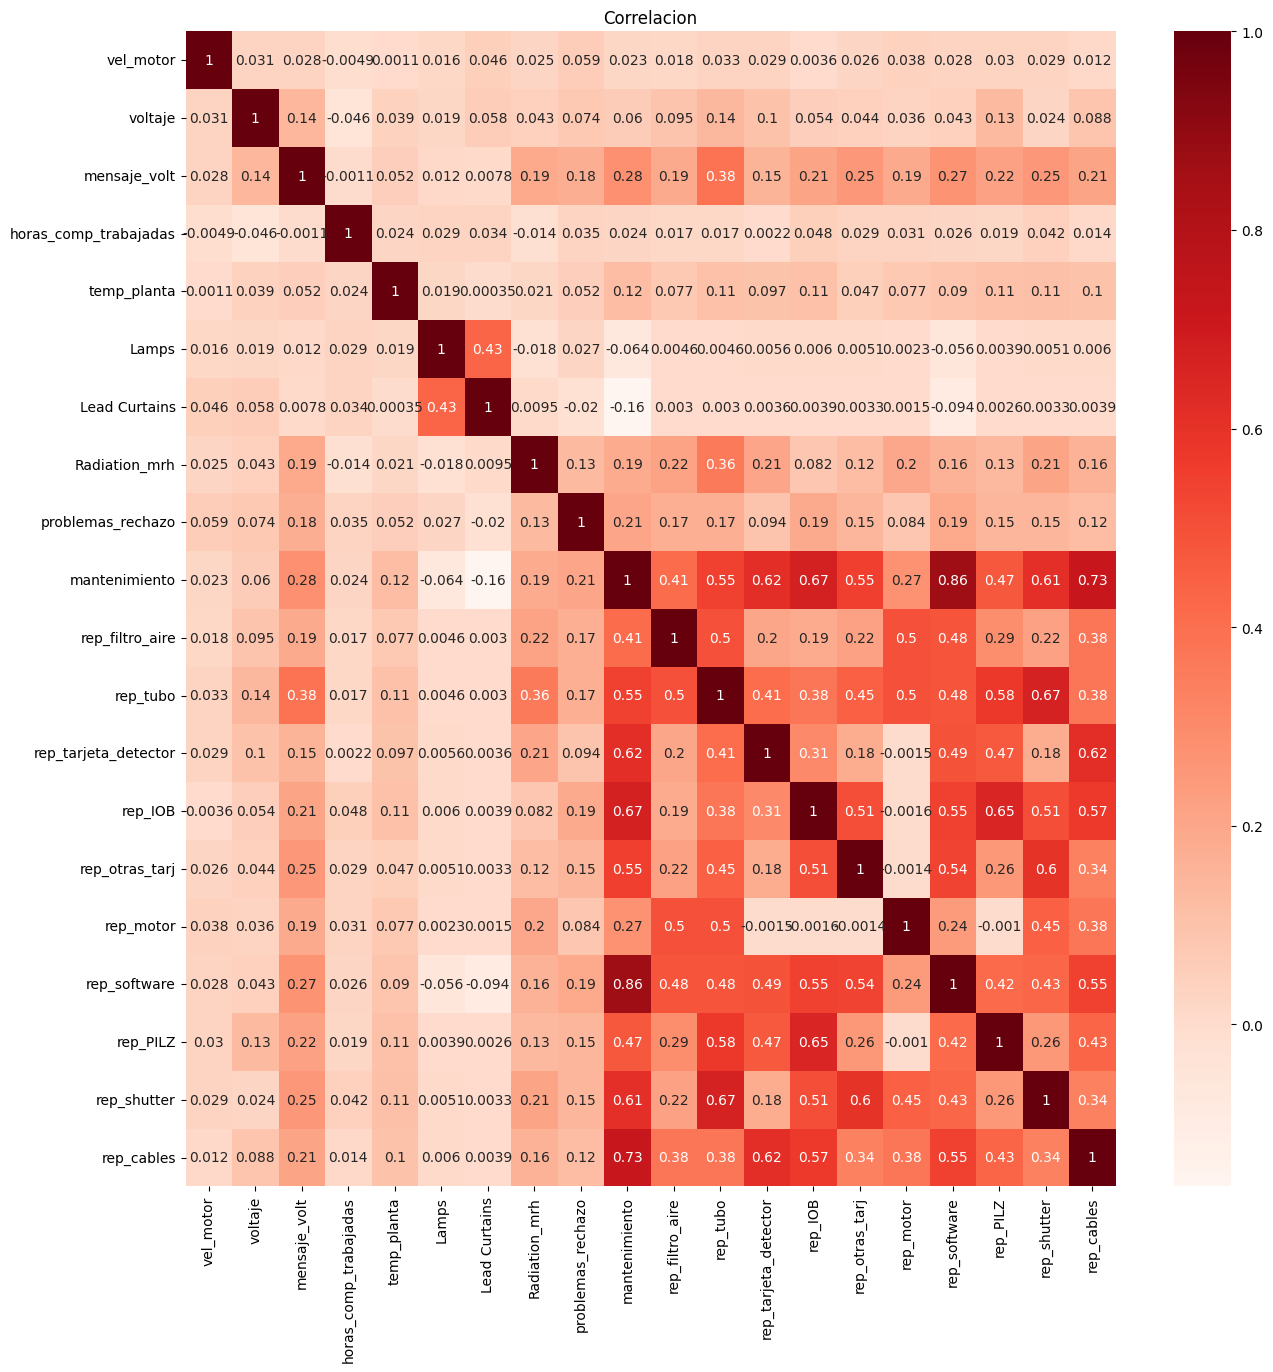

In [8]:
plt.figure(figsize=(15,15))
sns.heatmap(dataset_E162533.corr(), annot=True, annot_kws={'size':10}, cmap='Reds' )
plt.title("Correlacion")

In [9]:
print(len(dataset_E162533.loc["2018"]))
print(len(dataset_E162533.loc["2019"]))
print(len(dataset_E162533.loc["2020"]))
print(len(dataset_E162533.loc["2021"]))
# print(len(dataset_E162533.loc["2022"]))

365
365
366
222


In [10]:
# mantenimientos 2-correctivo, 1-preventivo, 0-no mantenimiento

dataset_E162533.loc["2018"]["mantenimiento"].value_counts()

0    362
1      2
2      1
Name: mantenimiento, dtype: int64

In [11]:
dataset_E162533.loc["2019"]["mantenimiento"].value_counts()

0    359
2      4
1      2
Name: mantenimiento, dtype: int64

In [12]:
dataset_E162533.loc["2020"]["mantenimiento"].value_counts()

0    363
1      2
2      1
Name: mantenimiento, dtype: int64

In [13]:
dataset_E162533.loc["2021"]["mantenimiento"].value_counts()

0    218
2      3
1      1
Name: mantenimiento, dtype: int64

In [14]:
mantenimiento_df = dataset_E162533[['vel_motor', 'voltaje', 'mensaje_volt', 
                 'horas_comp_trabajadas', 'temp_planta',
                 'Lamps', 'Lead Curtains', 'Radiation_mrh',
                 'problemas_rechazo', 'mantenimiento']]
mantenimiento_df

,vel_motor,voltaje,mensaje_volt,horas_comp_trabajadas,temp_planta,Lamps,Lead Curtains,Radiation_mrh,problemas_rechazo,mantenimiento
fecha,,,,,,,,,,
2017-02-01,26,219,0,8,28,2,2,0.02,0,0
2017-02-02,22,222,0,9,25,2,2,0.02,0,0
2017-02-03,24,217,0,9,30,2,2,0.02,0,0
2017-02-04,22,216,0,9,29,2,2,0.02,0,0
2017-02-05,24,222,0,8,26,2,2,0.02,0,0
...,...,...,...,...,...,...,...,...,...,...
2021-08-06,27,217,0,8,29,2,2,0.05,0,0
2021-08-07,27,222,0,9,30,2,2,0.02,0,0
2021-08-08,20,217,0,8,25,2,2,0.02,0,0


In [15]:
mantenimiento_valores = mantenimiento_df.values

In [16]:
mantenimiento_valores.shape

(1652, 10)

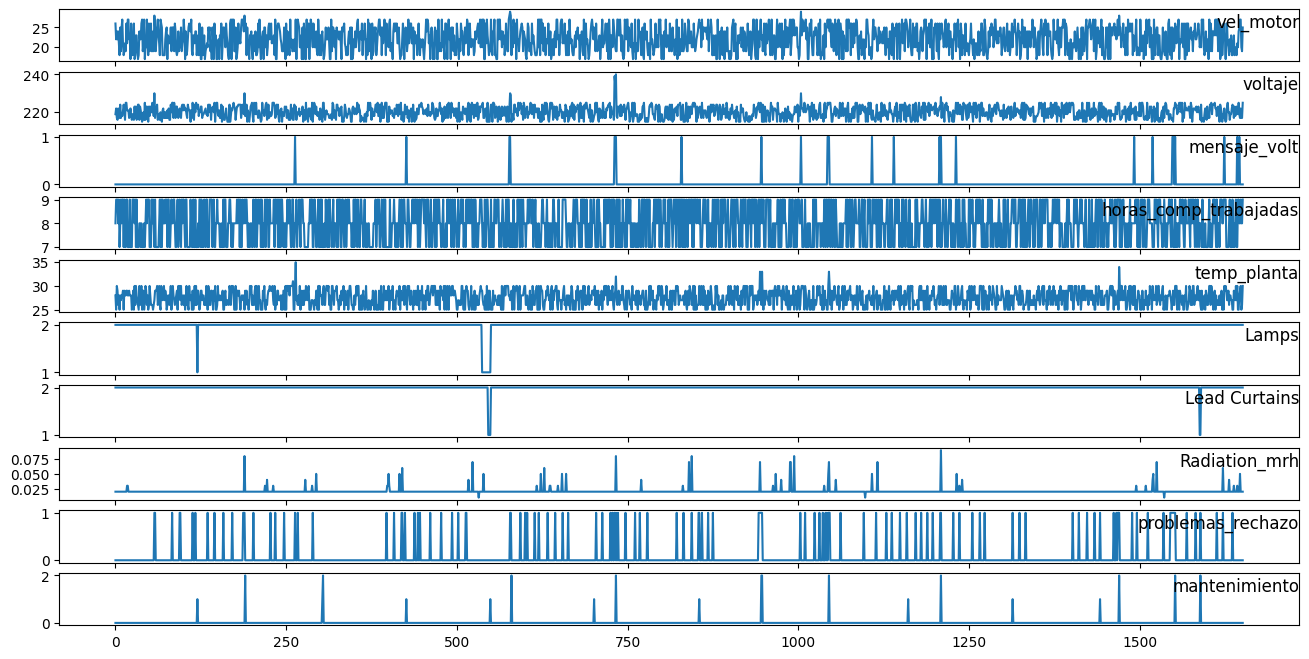

In [17]:
# columnas para gráficar
columnas = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
titulos = ['vel_motor', 'voltaje', 'mensaje_volt', 
           'horas_comp_trabajadas', 'temp_planta',
           'Lamps', 'Lead Curtains', 'Radiation_mrh',
           'problemas_rechazo', 'mantenimiento']
i=1

plt.figure(figsize=(16,8))

for columna in columnas:
    plt.subplot(len(columnas), 1, i)
    plt.plot(mantenimiento_valores[:,columna])
    plt.title(titulos[columna], y=0.5, loc="right")
    i+=1
plt.show()

In [18]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    from pandas import DataFrame
    from pandas import concat
    """
    Frame a time series as a supervised learning dataset.
    Arguments:
        data: Sequence of observations as a list or NumPy array.
        n_in: Number of lag observations as input (X).
        n_out: Number of observations as output (y).
        dropnan: Boolean whether or not to drop rows with NaN values.
    Returns:
        Pandas DataFrame of series framed for supervised learning.
    """
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

# Mantenimiento

In [19]:
mantto_val_floats = mantenimiento_valores.astype("float32")
# mantto_val_floats

In [20]:
scaler = MinMaxScaler(feature_range=(0,1))
mantto_val_scaled = scaler.fit_transform(mantto_val_floats)
# mantto_val_scaled

In [21]:
# mantto_val_scaled[0]

In [22]:
mantto_df_supervised = series_to_supervised(mantto_val_scaled,1,1)
mantto_df_supervised = mantto_df_supervised.drop(mantto_df_supervised.columns[[11, 12, 13,
                                                       14, 15, 16, 17, 18,
                                                       19]], axis=1)
mantto_df_supervised

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var10(t-1),var1(t)
1,0.750000,0.160001,0.0,0.5,0.3,1.0,1.0,0.125,0.0,0.0,0.416667
2,0.416667,0.280001,0.0,1.0,0.0,1.0,1.0,0.125,0.0,0.0,0.583333
3,0.583333,0.080000,0.0,1.0,0.5,1.0,1.0,0.125,0.0,0.0,0.416667
4,0.416667,0.040000,0.0,1.0,0.4,1.0,1.0,0.125,0.0,0.0,0.583333
5,0.583333,0.280001,0.0,0.5,0.1,1.0,1.0,0.125,0.0,0.0,0.333333
...,...,...,...,...,...,...,...,...,...,...,...
1647,0.666667,0.160001,1.0,0.5,0.3,1.0,1.0,0.125,0.0,0.0,0.833333
1648,0.833333,0.080000,0.0,0.5,0.4,1.0,1.0,0.500,0.0,0.0,0.833333
1649,0.833333,0.280001,0.0,1.0,0.5,1.0,1.0,0.125,0.0,0.0,0.250000
1650,0.250000,0.080000,0.0,0.5,0.0,1.0,1.0,0.125,0.0,0.0,0.166667


In [23]:
mantto_val_supervised = mantto_df_supervised.values
# mantto_val_supervised

In [44]:
# set de entrenamiento y test
n_dias_entrenamiento = 1000

train = mantto_val_supervised[:n_dias_entrenamiento,:]
test = mantto_val_supervised[n_dias_entrenamiento:,:]

In [45]:
train.shape

(1000, 11)

In [46]:
test.shape

(651, 11)

In [47]:
# entradas y salidas
train_X, train_y = train[:,:-1], train[:,-1]
test_X, test_y = test[:,:-1], test[:,-1]

In [48]:
# convertir datos a forma de 3 dimensiones [samples, timesteps, features]
train_X_3D = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X_3D = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

print(train_X_3D.shape, train_y.shape, test_X_3D.shape, test_y.shape)

(1000, 1, 10) (1000,) (651, 1, 10) (651,)


In [63]:
# diseño de red neuronal
mantto_model = Sequential()
mantto_model.add(LSTM(50, activation="tanh", input_shape=(train_X_3D.shape[0], train_X_3D.shape[2])))
mantto_model.add(Dense(1, activation="relu"))
mantto_model.compile(loss="mse", optimizer="adam")

In [64]:
print(train_X_3D.shape, train_y.shape, test_X_3D.shape, test_y.shape)

(1000, 1, 10) (1000,) (651, 1, 10) (651,)


In [65]:
train_X_3D.shape[0]

1000

In [66]:
train_X_3D.shape[2]

10

In [67]:
test_X_3D.shape

(651, 1, 10)

In [68]:
# probamos la red
history = mantto_model.fit(train_X_3D, train_y, 
                    epochs=150, batch_size=365, 
                    validation_data=(test_X_3D, test_y), 
                    verbose=2, shuffle=False)

Epoch 1/150


ValueError: in user code:

    File "C:\Mast\mast_env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "C:\Mast\mast_env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Mast\mast_env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "C:\Mast\mast_env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "C:\Mast\mast_env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Mast\mast_env\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_5" is incompatible with the layer: expected shape=(None, 1000, 10), found shape=(None, 1, 10)


In [61]:
# probamos la red
history = mantto_model.fit(train_X_3D, train_y, 
                    epochs=150, batch_size=365, 
                    validation_data=(test_X_3D, test_y), 
                    verbose=2, shuffle=False)

Epoch 1/150


ValueError: in user code:

    File "C:\Mast\mast_env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "C:\Mast\mast_env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Mast\mast_env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "C:\Mast\mast_env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "C:\Mast\mast_env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Mast\mast_env\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_4" is incompatible with the layer: expected shape=(None, 1000, 10), found shape=(None, 1, 10)


In [ ]:
# graficamos la perdida
plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="test")
plt.legend()
plt.show()

In [ ]:
# prediccion
y_hat = mantto_model.predict(test_X_3D)
y_hat

In [ ]:
from numpy import concatenate
# invertir escalado
inv_yhat = concatenate((y_hat, test_X[:,1:]), axis=1)
# inv_yhat

In [ ]:
# inv_yhat.shape

In [ ]:
inv_yhat_inverse = scaler.inverse_transform(inv_yhat)
# inv_yhat_inverse

In [ ]:
# inv_yhat_inverse.shape

In [ ]:
inv_yhat_esp = inv_yhat_inverse[:,0]
# inv_yhat_esp

In [ ]:
# inv_yhat_esp.shape

In [ ]:
test_y_reshaped = test_y.reshape((len(test_y),1))
# test_y_reshaped

In [ ]:
inv_y = concatenate((test_y_reshaped, test_X[:,1:]), axis=1)
# inv_y

In [ ]:
inv_y_inverse = scaler.inverse_transform(inv_y)
# inv_y_inverse

In [ ]:
inv_y_esp = inv_y_inverse[:,0]
# inv_y_esp

In [ ]:
plt.figure(figsize=(16, 8))
plt.scatter(range(len(inv_yhat_esp)), inv_yhat_esp, c='g', label="y_val")
plt.scatter(range(len(inv_y_esp)), inv_y_esp, c='r', label="results")
plt.legend(loc="best")
plt.title('validate')
plt.show()

In [ ]:
# calculo de RMSE
rmse = sqrt(mean_squared_error(inv_y_esp, inv_yhat_esp))
print("Test RMSE: %.3f" % rmse)

# Filtro del aire

In [69]:
filtro_aire_df = dataset_E162533[['vel_motor', 'voltaje', 'mensaje_volt', 
                 'horas_comp_trabajadas', 'temp_planta',
                 'Lamps', 'Lead Curtains', 'Radiation_mrh',
                 'problemas_rechazo', 'rep_filtro_aire']]
filtro_aire_df

,vel_motor,voltaje,mensaje_volt,horas_comp_trabajadas,temp_planta,Lamps,Lead Curtains,Radiation_mrh,problemas_rechazo,rep_filtro_aire
fecha,,,,,,,,,,
2017-02-01,26,219,0,8,28,2,2,0.02,0,0
2017-02-02,22,222,0,9,25,2,2,0.02,0,0
2017-02-03,24,217,0,9,30,2,2,0.02,0,0
2017-02-04,22,216,0,9,29,2,2,0.02,0,0
2017-02-05,24,222,0,8,26,2,2,0.02,0,0
...,...,...,...,...,...,...,...,...,...,...
2021-08-06,27,217,0,8,29,2,2,0.05,0,0
2021-08-07,27,222,0,9,30,2,2,0.02,0,0
2021-08-08,20,217,0,8,25,2,2,0.02,0,0


In [70]:
filtro_aire_valores = filtro_aire_df.values
# filtro_aire_valores

In [71]:
filtro_aire_floats = filtro_aire_valores.astype("float32")
# filtro_aire_floats

In [72]:
scaler = MinMaxScaler(feature_range=(0,1))
fa_val_scaled = scaler.fit_transform(filtro_aire_floats)
# fa_val_scaled

In [73]:
fa_df_supervised = series_to_supervised(fa_val_scaled,1,1)
fa_df_supervised = fa_df_supervised.drop(fa_df_supervised.columns[[11, 12, 13,
                                                       14, 15, 16, 17, 18,
                                                       19]], axis=1)
fa_df_supervised

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var10(t-1),var1(t)
1,0.750000,0.160001,0.0,0.5,0.3,1.0,1.0,0.125,0.0,0.0,0.416667
2,0.416667,0.280001,0.0,1.0,0.0,1.0,1.0,0.125,0.0,0.0,0.583333
3,0.583333,0.080000,0.0,1.0,0.5,1.0,1.0,0.125,0.0,0.0,0.416667
4,0.416667,0.040000,0.0,1.0,0.4,1.0,1.0,0.125,0.0,0.0,0.583333
5,0.583333,0.280001,0.0,0.5,0.1,1.0,1.0,0.125,0.0,0.0,0.333333
...,...,...,...,...,...,...,...,...,...,...,...
1647,0.666667,0.160001,1.0,0.5,0.3,1.0,1.0,0.125,0.0,0.0,0.833333
1648,0.833333,0.080000,0.0,0.5,0.4,1.0,1.0,0.500,0.0,0.0,0.833333
1649,0.833333,0.280001,0.0,1.0,0.5,1.0,1.0,0.125,0.0,0.0,0.250000
1650,0.250000,0.080000,0.0,0.5,0.0,1.0,1.0,0.125,0.0,0.0,0.166667


In [74]:
fa_val_supervised = fa_df_supervised.values
# fa_val_supervised

In [75]:
# set de entrenamiento y test
n_dias_entrenamiento = 1095

train = fa_val_supervised[:n_dias_entrenamiento,:]
test = fa_val_supervised[n_dias_entrenamiento:,:]

In [76]:
# entradas y salidas
train_X, train_y = train[:,:-1], train[:,-1]
test_X, test_y = test[:,:-1], test[:,-1]

In [77]:
# convertir datos a forma de 3 dimensiones [samples, timesteps, features]
train_X_3D = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X_3D = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

print(train_X_3D.shape, train_y.shape, test_X_3D.shape, test_y.shape)

(1095, 1, 10) (1095,) (556, 1, 10) (556,)


In [78]:
# diseño de red neuronal
fa_model = Sequential()
fa_model.add(LSTM(50, activation="tanh", input_shape=(train_X_3D.shape[0], train_X_3D.shape[2])))
fa_model.add(Dense(1, activation="relu"))
fa_model.compile(loss="mse", optimizer="adam")

In [79]:
# probamos la red
history = fa_model.fit(train_X_3D, train_y, 
                    epochs=150, batch_size=365, 
                    validation_data=(test_X_3D, test_y), 
                    verbose=2, shuffle=False)

Epoch 1/150


ValueError: in user code:

    File "C:\Mast\mast_env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "C:\Mast\mast_env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Mast\mast_env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "C:\Mast\mast_env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "C:\Mast\mast_env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Mast\mast_env\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_6" is incompatible with the layer: expected shape=(None, 1095, 10), found shape=(365, 1, 10)


In [ ]:
# graficamos la perdida
plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="test")
plt.legend()
plt.show()

In [ ]:
# prediccion
y_hat = fa_model.predict(test_X_3D)
y_hat

In [ ]:
from numpy import concatenate
# invertir escalado
inv_yhat = concatenate((y_hat, test_X[:,1:]), axis=1)
# inv_yhat

In [ ]:
inv_yhat_inverse = scaler.inverse_transform(inv_yhat)
# inv_yhat_inverse

In [ ]:
inv_yhat_esp = inv_yhat_inverse[:,0]
# inv_yhat_esp

In [ ]:
test_y_reshaped = test_y.reshape((len(test_y),1))
# test_y_reshaped

In [ ]:
inv_y = concatenate((test_y_reshaped, test_X[:,1:]), axis=1)
# inv_y

In [ ]:
inv_y_inverse = scaler.inverse_transform(inv_y)
# inv_y_inverse

In [ ]:
inv_y_esp = inv_y_inverse[:,0]
# inv_y_esp

In [ ]:
plt.figure(figsize=(16, 8))
plt.scatter(range(len(inv_yhat_esp)), inv_yhat_esp, c='g', label="y_val")
plt.scatter(range(len(inv_y_esp)), inv_y_esp, c='r', label="results")
plt.legend(loc="best")
plt.title('validate')
plt.show()

In [ ]:
# calculo de RMSE
rmse = sqrt(mean_squared_error(inv_y_esp, inv_yhat_esp))
print("Test RMSE: %.3f" % rmse)